<a href="https://githubtocolab.com/alsinmr/WindeschleubaNMRSchool/blob/main/JupyterExercises/Sol5/ex05_T1_1and2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Density Functions: T$_1$ Relaxation
### Solution to 1.1 and 1.2

### 1) Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 16})
from numpy import pi

### 2) Define Constants

In [5]:
mu0 = 4*pi*1e-7                   #V s / A / m
hbar = 1.05457266e-34             #J s / rad
h = 2*pi*hbar                     #J s
gammaH = 26.7522128e7             #rad / s / T
gammaN = -2.7116e7                #rad / s / T
rNH = 1.1*1e-10                   #m 

### 3) Functions

In [6]:
#Spectral density function (for isotropic tumbling)
    #Call as: Jiso(omega, tau)
    #one of the two inputs can be an array
Jiso = lambda omega, tau: (2/5)*tau/(1+(omega*tau)**2)

### 4) Parameters

In [7]:
B0 = 14.1                           #T
sigma_zz1 = 0                       #ppm
sigma_zz2 = 50                      #ppm
sigma_zz3 = 150;                    #ppm
tauC = 10**np.arange(-12,-5,.01)    #s

omegaI = -B0*gammaH                 #rad/s, 1H Larmor frequency
omegaS = -B0*gammaN                 #rad/s, 15N Larmor frequency

deltaIS = -2*mu0*gammaH*gammaN*hbar/(4*pi)/rNH**3

### 5) Calculate T$_{1S}$

In [9]:
#s. Eq. (3) on the exercise sheet
    #note that sigma_zz is given in ppm above
R1S_1 = (deltaIS/4)**2 * (Jiso(omegaI-omegaS, tauC) \
                          + 3*Jiso(omegaS, tauC) + 6*Jiso(omegaI+omegaS, tauC)) \
                          + 3/4 * (omegaS*sigma_zz1*1e-6)**2 * Jiso(omegaS, tauC)
R1S_2 = (deltaIS/4)**2 * (Jiso(omegaI-omegaS, tauC) \
                          + 3*Jiso(omegaS, tauC) + 6*Jiso(omegaI+omegaS, tauC)) \
                          + 3/4 * (omegaS*sigma_zz2*1e-6)**2 * Jiso(omegaS, tauC)
R1S_3 = (deltaIS/4)**2 * (Jiso(omegaI-omegaS, tauC) \
                          + 3*Jiso(omegaS, tauC) + 6*Jiso(omegaI+omegaS, tauC)) \
                          + 3/4 * (omegaS*sigma_zz3*1e-6)**2 * Jiso(omegaS, tauC)

T1S_1 = 1/R1S_1
T1S_2 = 1/R1S_2
T1S_3 = 1/R1S_3

### 5a) Double Logarithmic Plot of T$_{1S}$ vs. $\omega_S*\tau_c$

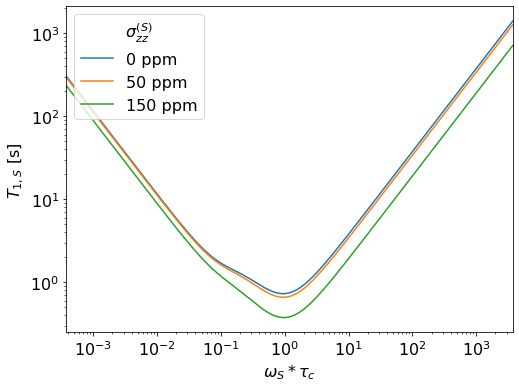

In [30]:
fig,ax=plt.subplots()
fig.set_size_inches([8,6])
ax.loglog(omegaS*tauC, T1S_1, linewidth=1.5)
ax.loglog(omegaS*tauC, T1S_2, linewidth=1.5)
ax.loglog(omegaS*tauC, T1S_3, linewidth=1.5)
ax.set_xlabel(r"$\omega_S*\tau_c$")
ax.set_ylabel(r"$T_{1,S}$ [s]")
ax.set_xlim([tauC[0]*omegaS,tauC[-1]*omegaS])
_=ax.legend(["0 ppm", "50 ppm", "150 ppm"],title=r'$\sigma_{zz}^{(S)}$',
         loc='upper left')

### 5a.1) Semi-log. Plot of $R_{1S}$ vs. $\tau_c$ for 0 ppm

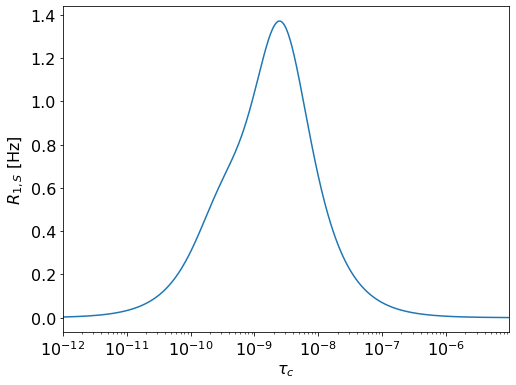

In [29]:
fig,ax=plt.subplots()
fig.set_size_inches([8,6])
ax.semilogx(tauC, R1S_1, linewidth=1.5)
ax.set_xlabel(r"$\tau_c$")
ax.set_ylabel(r"$R_{1,S}$ [Hz]")
_=ax.set_xlim([tauC[0],tauC[-1]])

### 6) Double Logarithmic Plot of $J_{iso}$

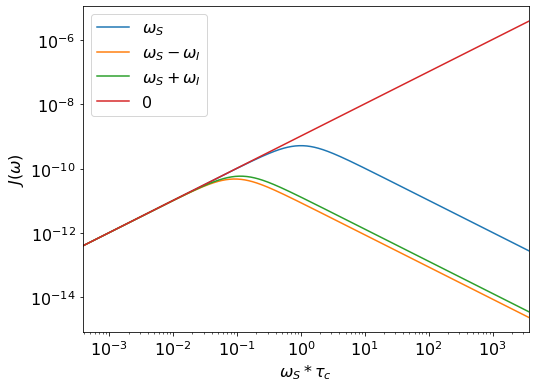

In [28]:
J_omegaS = Jiso(omegaS, tauC)
J_omegaSMomegaI = Jiso(omegaS-omegaI, tauC)
J_omegaSPomegaI = Jiso(omegaS+omegaI, tauC)
J_0 = Jiso(0, tauC)

fig,ax=plt.subplots()
fig.set_size_inches([8,6])
ax.loglog(omegaS*tauC, J_omegaS, linewidth=1.5)
ax.loglog(omegaS*tauC, J_omegaSMomegaI, linewidth=1.5)
ax.loglog(omegaS*tauC, J_omegaSPomegaI, linewidth=1.5)
ax.loglog(omegaS*tauC, J_0, linewidth=1.5)
ax.set_xlabel(r"$\omega_S*\tau_c$")
ax.set_ylabel(r"$J(\omega)$")
ax.set_xlim([tauC[0]*omegaS,tauC[-1]*omegaS])
ax.legend([r"$\omega_S$" ,r"$\omega_S - \omega_I$", r"$\omega_S + \omega_I$", "0"],
         loc='upper left')